In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [6]:

cs = pd.read_csv('C:/Users/82102/OneDrive - dongguk.edu/바탕 화면/미래에셋 공모전/미래에셋_Project/자산규모낮은군집.csv', low_memory=False)


In [7]:
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803308 entries, 0 to 803307
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   접속일수_M4           803308 non-null  int64  
 1   총자산액_M4           803308 non-null  int64  
 2   체결횟수_M4           803308 non-null  int64  
 3   매수매도종목수           803308 non-null  int64  
 4   이율_M4             740692 non-null  float64
 5   평균이율              720975 non-null  float64
 6   DMST_ITM_CNT_M4   803308 non-null  int64  
 7   CASH_AST_M4       803308 non-null  int64  
 8   DMST_AST_EVAL_M4  803308 non-null  int64  
 9   DAY_TR_RATIO      803308 non-null  float64
 10  SWING_TR_RATIO    803308 non-null  float64
 11  MONTHS_TR_RATIO   803308 non-null  float64
 12  MID_TR_RATIO      803308 non-null  float64
 13  HLD_TR_RATIO      803308 non-null  float64
 14  YEARS_TR_RATIO    803308 non-null  float64
 15  BUY1_ITM_M4_1     284687 non-null  object 
 16  BUY1_ITM_M4_2     26

In [8]:
selected_columns = ['CASH_AST_M4', 'DMST_AST_EVAL_M4', '평균이율', '매수매도종목수', '이율_M4', 'cluster_tend']

selected_columns2 = ['DAY_TR_RATIO', 'SWING_TR_RATIO', 'MONTHS_TR_RATIO', 
                    'MID_TR_RATIO', 'HLD_TR_RATIO', 'YEARS_TR_RATIO', 
                    'CASH_AST_M4', 'DMST_AST_EVAL_M4', '체결횟수_M4', 
                    '매수매도종목수', 'DMST_ITM_CNT_M4']



In [11]:
cl_cs = cs[selected_columns].copy()
cl_cs.fillna(0, inplace=True)

cl_cs.replace(np.inf, pd.NA, inplace=True)
cl_cs.dropna(subset=['이율_M4', '평균이율'], inplace=True)

C:\Users\82102\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\82102\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

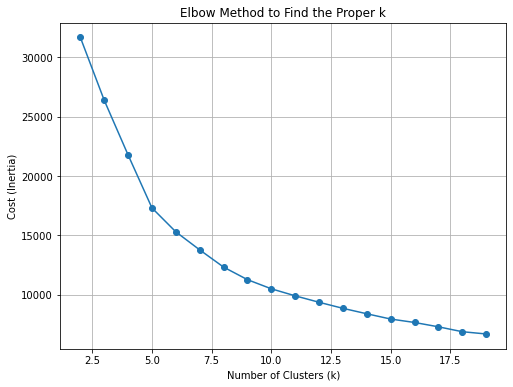

In [12]:
cl_cs_filtered = cl_cs[cl_cs['cluster_tend'] == '10'] 
cl_cs_filtered .drop('cluster_tend', axis=1, inplace=True)

# 표준화 진행
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cl_cs_filtered)

# k 찾기
costs = []
k_values = range(2, 20) 

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    costs.append(kmeans.inertia_)

# Elbow Method 
plt.figure(figsize=(8, 6))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method to Find the Proper k')
plt.grid(True)
plt.show()



In [9]:
# k-means 
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# cluster 번호 지정
cl_cs_filtered['Cluster'] = clusters
centroid_values = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroid_values, columns=selected_columns2)

centroid_df

<ipython-input-9-77c216feb05f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl_cs_filtered['Cluster'] = clusters


,DAY_TR_RATIO,SWING_TR_RATIO,MONTHS_TR_RATIO,MID_TR_RATIO,HLD_TR_RATIO,YEARS_TR_RATIO,CASH_AST_M4,DMST_AST_EVAL_M4,체결횟수_M4,매수매도종목수,DMST_ITM_CNT_M4
0,-0.306895,-0.391789,-0.365817,-0.428998,-0.268421,2.518598,-0.231182,0.223763,-0.157350,-0.195867,0.094905
1,-0.046496,-0.003659,0.082256,0.198910,0.133210,0.213640,-0.293852,0.347403,0.125254,0.435623,4.045051
2,2.633603,0.844407,0.219263,-0.272847,-0.356596,-0.388313,0.386840,-0.306148,7.383324,6.936566,0.645963
3,-0.098166,0.158320,2.772005,0.046890,-0.270882,-0.327974,-0.178232,0.149689,-0.034203,0.010565,-0.109694
4,-0.321053,-0.438196,-0.418697,-0.543783,-0.411361,-0.418011,-0.369066,0.305695,-0.185626,-0.249867,-0.122297
5,0.177528,2.749201,0.165623,-0.229414,-0.328556,-0.369303,-0.224985,0.186777,0.003723,0.083897,-0.145017
6,-0.302165,-0.378257,-0.331216,-0.346755,2.691031,-0.260677,-0.204922,0.160487,-0.148848,-0.174181,0.036272
7,-0.067097,0.035916,0.039959,0.144109,-0.039285,-0.042599,2.464280,-2.102911,-0.074448,-0.079623,-0.580047
8,-0.245562,-0.239187,-0.133963,2.113351,-0.196552,-0.320784,-0.251153,0.225179,-0.104092,-0.105565,-0.047955
9,3.382586,0.605533,0.017976,-0.334216,-0.367721,-0.392364,0.013634,-0.056081,0.472368,0.796017,-0.221394


In [10]:
cluster_counts = cl_cs_filtered.groupby('Cluster').size().reset_index(name='Sample Count')

result_df = pd.merge(centroid_df, cluster_counts, left_index=True, right_on='Cluster')

print(result_df)

   DAY_TR_RATIO  SWING_TR_RATIO  MONTHS_TR_RATIO  MID_TR_RATIO  HLD_TR_RATIO  \
0     -0.306895       -0.391789        -0.365817     -0.428998     -0.268421   
1     -0.046496       -0.003659         0.082256      0.198910      0.133210   
2      2.633603        0.844407         0.219263     -0.272847     -0.356596   
3     -0.098166        0.158320         2.772005      0.046890     -0.270882   
4     -0.321053       -0.438196        -0.418697     -0.543783     -0.411361   
5      0.177528        2.749201         0.165623     -0.229414     -0.328556   
6     -0.302165       -0.378257        -0.331216     -0.346755      2.691031   
7     -0.067097        0.035916         0.039959      0.144109     -0.039285   
8     -0.245562       -0.239187        -0.133963      2.113351     -0.196552   
9      3.382586        0.605533         0.017976     -0.334216     -0.367721   

   YEARS_TR_RATIO  CASH_AST_M4  DMST_AST_EVAL_M4   체결횟수_M4   매수매도종목수  \
0        2.518598    -0.231182          0.22376